# Interactive Plots and Diagrams

In [1]:
using Reactive, Interact

Interactive plotting can be useful and fun. Here we have a few examples to get you started creating your own interactive plots. We will extensively use the `@manipulate` macro from the [introductory notebook](Introduction.ipynb).

## Compose

[Compose](http://composejl.org) is an excellent tool for creating declarative vector graphics. Here is an example compose diagram you can play around with.

Interact.Options{:ToggleButtons,String}(Signal{String}(yellow, nactions=1),"color","yellow","yellow",Interact.OptionDict(DataStructures.OrderedDict("yellow"=>"yellow","cyan"=>"cyan","tomato"=>"tomato"),Dict("cyan"=>"cyan","yellow"=>"yellow","tomato"=>"tomato")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(3.1500000000000004, nactions=1),"rotate",3.1500000000000004,"3.1500000000000004",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15000000000000002"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.30000000000000004"=>0.3,"0.35000000000000003"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(4.3=>"4.3",3.15=>"3.1500000000000004",2.0=>"2.0",4.05=>"4.05",1.5=>"1.5",3.25=>"3.25",3.65=>"3.6500000000000004",4.55=>"4.55",2.75=>"2.75",6.2=>"6.2"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(12, nactions=1),"n",12,"12",Interact.OptionDict(DataStructures.OrderedDict("3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10,"11"=>11,"12"=>12…),Dict(16=>"16",11=>"11",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17",8=>"8",6=>"6",4=>"4"…)),Any[],Any[],true,"horizontal")

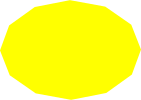

In [2]:
using Colors
using Compose

@manipulate for color=["yellow", "cyan", "tomato"], rotate=0:.05:2π, n=3:20
    compose(context(), fill(parse(Colorant, color)),
    polygon([((1+sin(θ+rotate))/2, (1+cos(θ+rotate))/2) for θ in 0:2π/n:2π]))
end

## Gadfly

In [3]:
using Gadfly

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(6.283185307179586, nactions=1),"ϕ",6.283185307179586,"6.283185307179586",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.19634954084936207"=>0.19635,"0.39269908169872414"=>0.392699,"0.5890486225480862"=>0.589049,"0.7853981633974483"=>0.785398,"0.9817477042468103"=>0.981748,"1.1780972450961724"=>1.1781,"1.3744467859455345"=>1.37445,"1.5707963267948966"=>1.5708,"1.7671458676442586"=>1.76715…),Dict(7.85398=>"7.853981633974483",11.3883=>"11.388273369263",10.0138=>"10.013826583317465",2.74889=>"2.748893571891069",1.5708=>"1.5707963267948966",4.90874=>"4.908738521234052",5.30144=>"5.301437602932776",2.94524=>"2.945243112740431",10.4065=>"10.40652566501619",3.33794=>"3.3379421944391554"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Function}(Signal{Function}(sin, nactions=1),"f",sin,"sin",Interact.OptionDict(DataStructures.OrderedDict{String,Function}("sin"=>sin,"cos"=>cos),Dict{Function,String}(Pair{Function,String}(sin,"sin"),Pair{Function,String}(cos,"cos"))),Any[],Any[],true,"horizontal")

Interact.Checkbox(Signal{Bool}(false, nactions=0),"both",false)

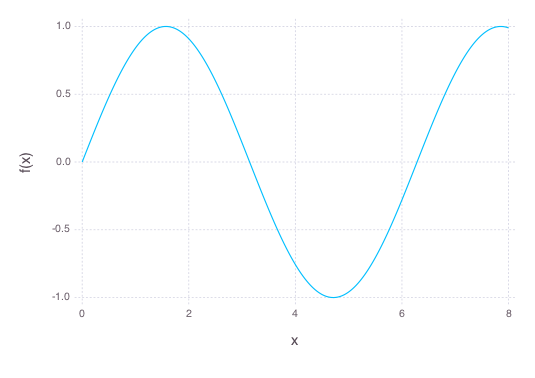

In [4]:
@manipulate for ϕ = 0:π/16:4π, f = [sin, cos], both = false
    if both
        plot([θ -> sin(θ + ϕ), θ -> cos(θ + ϕ)], 0, 8)
    else
        plot(θ -> f(θ + ϕ), 0, 8)
    end
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(13, nactions=1),"n",13,"13",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",25=>"25",10=>"10",19=>"19"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,DataType}(Signal{DataType}(Gadfly.Geom.PointGeometry, nactions=1),"g",Gadfly.Geom.PointGeometry,"Gadfly.Geom.PointGeometry",Interact.OptionDict(DataStructures.OrderedDict("Gadfly.Geom.PointGeometry"=>Gadfly.Geom.PointGeometry,"Gadfly.Geom.LineGeometry"=>Gadfly.Geom.LineGeometry),Dict(Gadfly.Geom.PointGeometry=>"Gadfly.Geom.PointGeometry",Gadfly.Geom.LineGeometry=>"Gadfly.Geom.LineGeometry")),Any[],Any[],true,"horizontal")

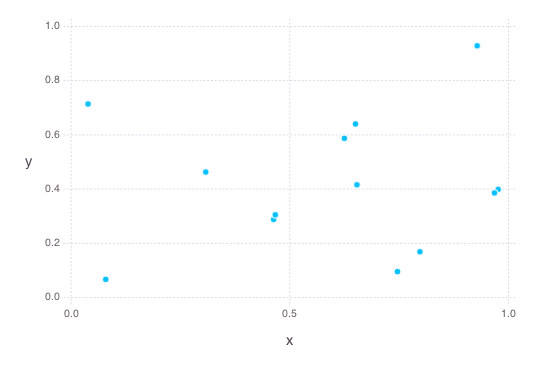

In [5]:
@manipulate for n=1:25, g=[Geom.point, Geom.line]
    Gadfly.plot(y=rand(n), x=rand(n), g)
end

## PyPlot

In [6]:
using PyPlot

INFO: Recompiling stale cache file /Users/job/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


Since PyPlot images are often displayed as the result of function side-effects, you'll need to take an extra step in order for interactive PyPlot graphics to be updated properly as widget values are updated. You do this by using the `withfig` function to specify a figure object that will be updated in each iteration of `@manipulate`. Notice `f = figure()` and `withfig(f)` in the example below. The rest of it is straightforward.

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"α",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"β",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"γ",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=1),"leg",nothing,"a funny plot")

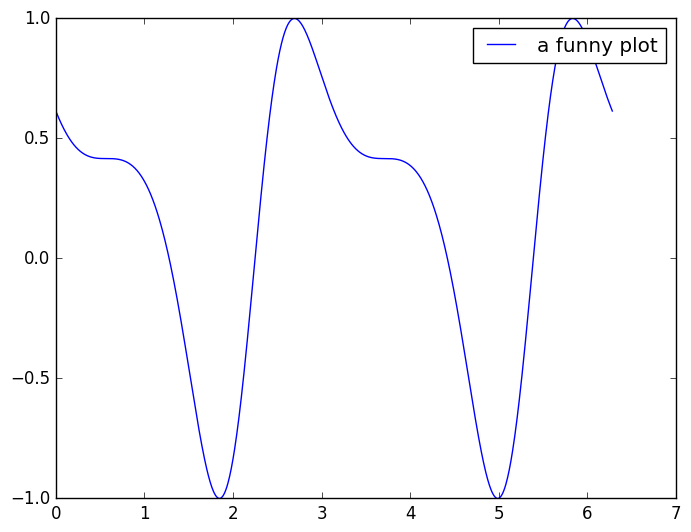

In [7]:
f = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg="a funny plot"; withfig(f) do
        PyPlot.plot(x, cos(α*x + sin(β*x + γ)))
        legend([leg])
    end
end

As an added bonus, you can even fire up a Python GUI with `pygui(true)` and be able to use the widgets above to update the plot.

# PyPlot Subplots

Manipulating a PyPlot figure with multiple subplots adds an extra layer of complication. The `withfig` function clears the current figure window by default at each `@manipulate` iteration. If you're manipulating multiple subplots in one figure they will not be displayed correctly. To prevent subplots being destroyed use `withfig(f,clear=false)`. Setting `clear=false` leaves the responsibility for clearing the figure window up to the user. In the case of multiple subplots you can clear each axes object individually, rather than the figure itself. This is shown in the example below.

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"α",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"β",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"γ",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=1),"leg1",nothing,"a funny plot")

Interact.Textbox{AbstractString}(Signal{AbstractString}( an even funnier plot, nactions=1),"leg2",nothing," an even funnier plot")

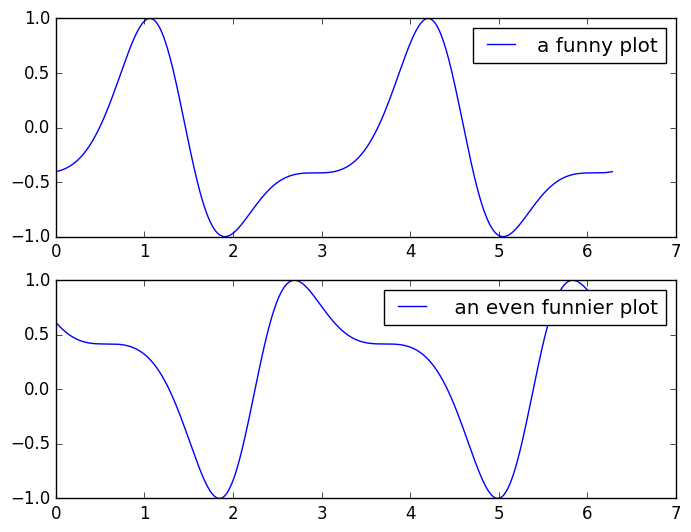

In [8]:
f2,axes = subplots(2,1)
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg1="a funny plot", leg2=" an even funnier plot" 
    withfig(f2,clear=false) do
        for ax in axes
            ax[:cla]()
        end
        axes[1][:plot](x, sin(α*x + cos(β*x + γ)))
        axes[2][:plot](x, cos(α*x + sin(β*x + γ)))
        axes[1][:legend]([leg1])
        axes[2][:legend]([leg2])
    end
end